### Analysis of the classifications and markings from the 'blind' ACS and WFC3 images


7133 images were shown to the volunteers, taken by the ACS and WFC3 camera within 10 degrees in ecliptic latitude. These images had no green markers.

This is a separate notebook for their analysis, because the classifications require slightly different treatment since the retirement limit was lower (N=20 per image), and also the dimensions of the images are slightly different

In [12]:
import pandas as pd
import numpy as np
import os
import os.path
import glob
import json

from PIL import Image
import PIL.ImageOps
import squarify

import matplotlib.pyplot as plt
%matplotlib inline

Classifications statistics by users

The retirement limit for these images was set to = 20

         user_label  seed  nclass_user  n_gs  weight    color
0         EEZuidema     0         7135     0       1  #98EA15
1        voyager168     0         5603     0       1  #B3205E
2           hermesp     0         4849     0       1  #B87BE3
3     G.Roddenberry     0         4275     0       1  #D75FB6
4        MGriffin19     0         4188     0       1  #E8AA1E
5          graham_d     0         4179     0       1  #336FB2
6      Dolorous_Edd     0         4123     0       1  #A2FA97
7        ElisabethB     0         3846     0       1  #C99B9E
8          Chriscav     0         3344     0       1  #E0F711
9            nilium     0         3158     0       1  #934335
10       cstrauss31     0         2811     0       1  #B626F7
11       SearcherPG     0         2683     0       1  #2CBAF5
12          konakid     0         2388     0       1  #B8D10C
13  CynicalStranger     0         2248     0       1  #A0A93D
14     Sovanacharya     0         2023     0       1  #8B55FB
15      

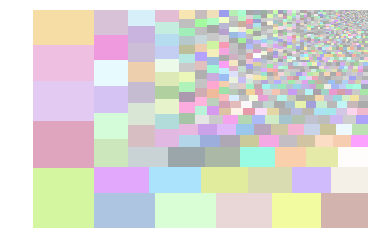

In [13]:
classifications = pd.read_csv("class_counts_colors_blind.csv")

#print 20 most prolific classifiers

print(classifications.head(20))

print('Mean number of classifications per user: ', np.mean(classifications["nclass_user"]))
print('Median number of classifications per user: ', np.median(classifications["nclass_user"]))
print('Maximum number of classifications per user: ', np.max(classifications["nclass_user"]))

def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2
    return (fair_area - area) / fair_area

print("Gini coefficient for project: %.3f" % gini(classifications['nclass_user']))

#takes a long time to run

squarify.plot(sizes=classifications["nclass_user"], color=classifications["color"], alpha=.4 )
plt.axis('off')
plt.show()

### Analysis

Upload dataset

In [14]:
data = pd.read_csv("asteroid_blind_classifications_markings.csv")
data=data.fillna(0)

data["total"]=data["data.impossible-to-tell"]+data["data.yes"]+data["data.no"]
data["p_yes"]=data["data.yes"]/data["total"]
data["p_no"]=data["data.no"]/data["total"]
data["p_impossible_to_tell"]=data["data.impossible-to-tell"]/data["total"]

data.loc[data["p_yes"]>=0.3, 'ast'] = 1
data.loc[data["p_yes"]<0.3, 'ast'] = 0

#data.to_csv("results_asteroids_acs_extract.csv")
data.head

<bound method NDFrame.head of        subject_id_1                     filename  workflow_id_1 task_1  \
0          34966999  jbz206020_drz_2013EH104.png          11483     T0   
1          34954704  j8pm06010_drz_2015AQ146.png          11483     T0   
2          34954259  j8oz05010_drz_2015VM154.png          11483     T0   
3          34960969    j9epc7bbq_drz_2017OY9.png          11483     T0   
4          34967530   jc050mgnq_drz_2012JQ14.png          11483     T0   
...             ...                          ...            ...    ...   
14221      35299930            ibig04020_drz.png          11483     T2   
14222      35299923            ibig04050_drz.png          11483     T2   
14223      35299917            ibig04010_drz.png          11483     T2   
14224      35299911            ibs444010_drz.png          11483     T2   
14225      35299902            icas23010_drz.png          11483     T2   

              reducer_1  data.no  data.yes  data.impossible-to-tell  \
0      que

### Select only first asteroid image

T0 - corresponds to the first question: Asteroid? Answers: Yes/No/Impossible to tell

T2 - corresponds to the second question about additional asteroids. Answers: Yes/No/Impossible to tell

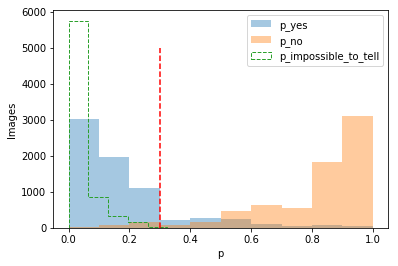

In [15]:
T0=data[data["task_1"] == "T0"]

fig, ax = plt.subplots()
alpha = 0.4
bins = 10

ax.hist(T0["p_yes"],alpha=alpha,bins=bins)
ax.hist(T0["p_no"],histtype='stepfilled',ls="-.",alpha=alpha,bins=bins)
ax.hist(T0["p_impossible_to_tell"],histtype='step',ls="--",bins=bins)
ax.legend()
ax.set_xlabel("p")
ax.set_ylabel("Images")

# set limit for images to select to p_asteroid>0.3, since there seems to be a transition around this region of the histogram

ax.plot([0.3,0.3],[0,5000],"r--")


### Check some example images

URLs to images are located in the "locations" column of the dataset in a JSON string

https://panoptes-uploads.zooniverse.org/production/subject_location/837b77fd-c9cd-4355-bb8f-3f665930ab4e.png


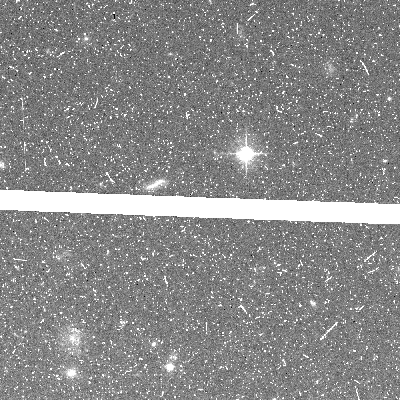

In [17]:
#take a random example of an image with p_yes>0.3

check = T0.loc[(T0["p_yes"]>0.3)].sample()

url = json.loads(check['locations'].iloc[0])

print(url['0'])

import requests
from io import BytesIO

response = requests.get(url['0'])
Image.open(BytesIO(response.content))

2155    j8ds02020_drz_2015BV21.png
Name: filename, dtype: object


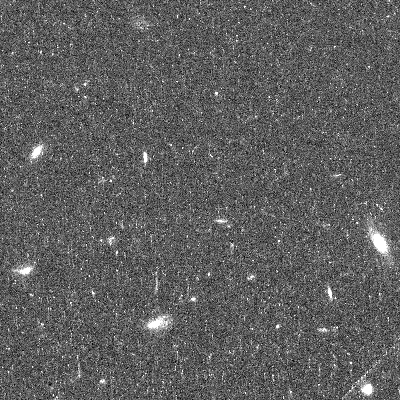

In [24]:
base_url='/Users/skruk/Documents/ESA_citizen_science/Asteroid_finder/Results/Blind_images/'

check = T0.loc[(T0["p_yes"]>0.3)]
print(check["filename"].sample())

Image.open(base_url+str(check["filename"].sample().to_string(index=False).strip()))

6523    iabz33rfq_drz.png
Name: filename, dtype: object


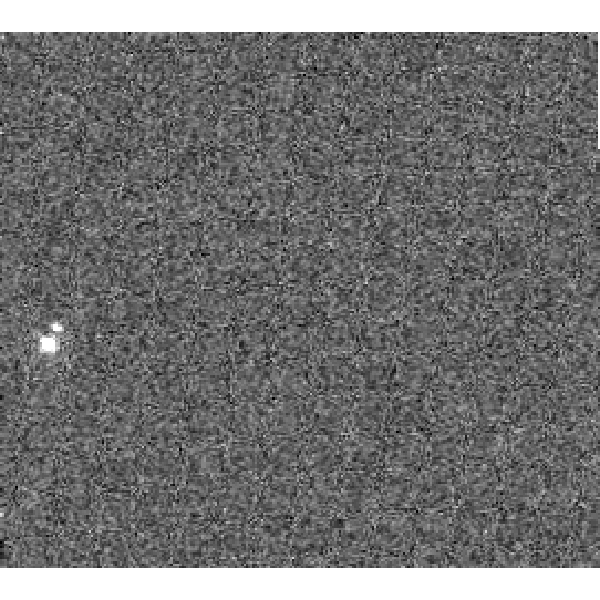

In [25]:
check = T0.loc[(T0["p_impossible_to_tell"]>0.2)]
print(check["filename"].sample())

Image.open(base_url+str(check["filename"].sample().to_string(index=False).strip()))

### Select images with 2 asteroids

/Users/skruk/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/skruk/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0, 1)

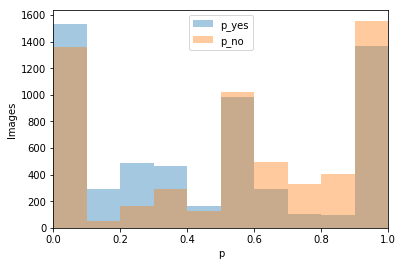

In [26]:
T2=data[data["task_1"] == "T2"]

fig, ax = plt.subplots()
alpha = 0.4
bins = 10

ax.hist(T2["p_yes"],alpha=alpha,bins=bins)
ax.hist(T2["p_no"],histtype='stepfilled',ls="-.",alpha=alpha,bins=bins)

ax.legend()
ax.set_xlabel("p")
ax.set_ylabel("Images")
ax.set_xlim(0,1)


There are 342 images with 2 asteroids
11702    iboa94b6q_drz.png
Name: filename, dtype: object


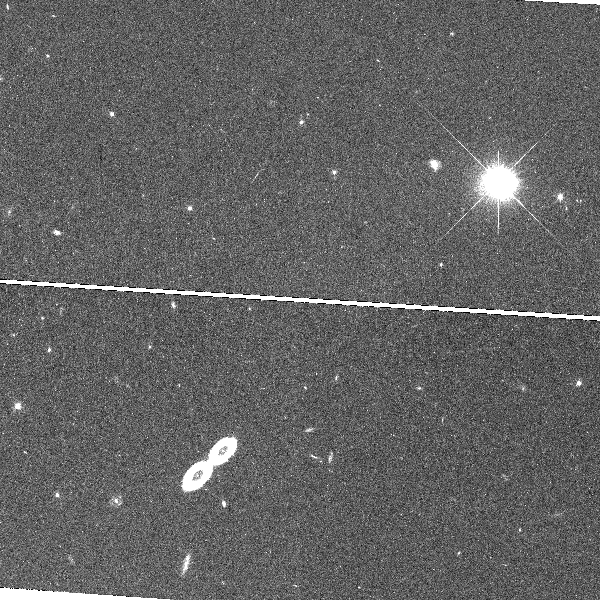

In [28]:
#Select images where at least 5 people answered the second question

check = T2.loc[(T2["p_yes"]>0.5) & (T2["data.yes"]+T2["data.no"]+T2["data.impossible-to-tell"]>=5)]
print('There are {} images with 2 asteroids'.format(len(check)))
print(check["filename"].sample())

Image.open(base_url+str(check["filename"].sample().to_string(index=False).strip()))

### Plot asteroid markings

### Plot all the markings for an example image

Number of images with asteroids (p_ast>0.3):  1020
Fraction of images with asteroids (p_ast>0.3):  0.143


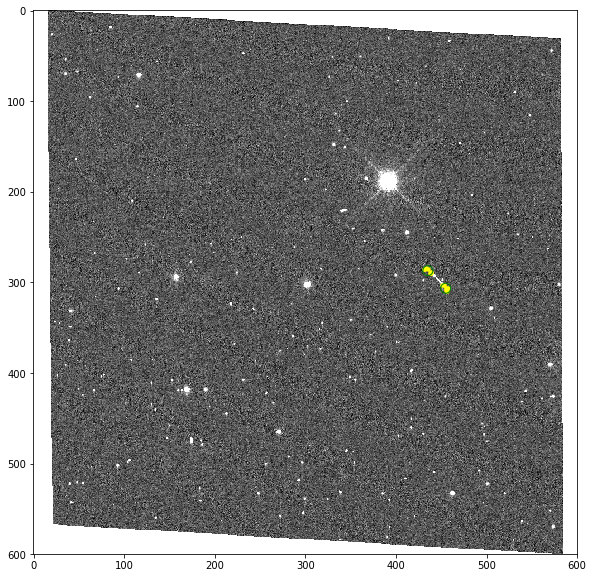

In [29]:
figsize=(10,10)
fig, ax = plt.subplots(figsize=figsize)

# select only images for which >30% of volunteers said 'yes' for asteroid trail

T0_asteroid=T0[T0["p_yes"]>0.3]

print("Number of images with asteroids (p_ast>0.3): ",len(T0_asteroid))
print("Fraction of images with asteroids (p_ast>0.3): ",np.round(len(T0_asteroid)/len(T0),3))

ex = T0_asteroid.sample()

img = plt.imread(base_url+str(ex["filename"].to_string(index=False).strip()))
ax.imshow(img)

# plot *all* the markings
x = ex["data.frame0.T1_tool0_points_x"].iloc[0]

x1 = tuple(float(s) for s in x.strip("[]").split(","))
x2 = tuple(float(s) for s in x.strip("[]").split(","))

y = ex["data.frame0.T1_tool0_points_y"].iloc[0]

y1 = tuple(float(s) for s in y.strip("[]").split(","))
y2 = tuple(float(s) for s in y.strip("[]").split(","))

ax.scatter(x1,y1,s=10,facecolors='yellow',edgecolors='yellow')
ax.scatter(x2,y2,s=10,facecolors='yellow',edgecolors='yellow')

# plot the *clustered* markings only

x = ex["data.frame0.T1_tool0_clusters_x"].iloc[0]

x1 = tuple(float(s) for s in x.strip("[]").split(","))[0]
x2 = tuple(float(s) for s in x.strip("[]").split(","))[1]

y = ex["data.frame0.T1_tool0_clusters_y"].iloc[0]
y1 = tuple(float(s) for s in y.strip("[]").split(","))[0]
y2 = tuple(float(s) for s in y.strip("[]").split(","))[1]

ax.scatter(x1,y1,s=100,facecolors='none',edgecolors='green')
ax.scatter(x2,y2,s=100,facecolors='none',edgecolors='green')

Int64Index([   3,    4,    7,   11,   14,   26,   30,   31,   36,   40,
            ...
            7034, 7035, 7039, 7040, 7046, 7062, 7077, 7086, 7090, 7097],
           dtype='int64', length=1020)


FileNotFoundError: [Errno 2] No such file or directory: 'Blind_asteroid_markings/j9epc7bbq_drz_2017OY9_marked.png'

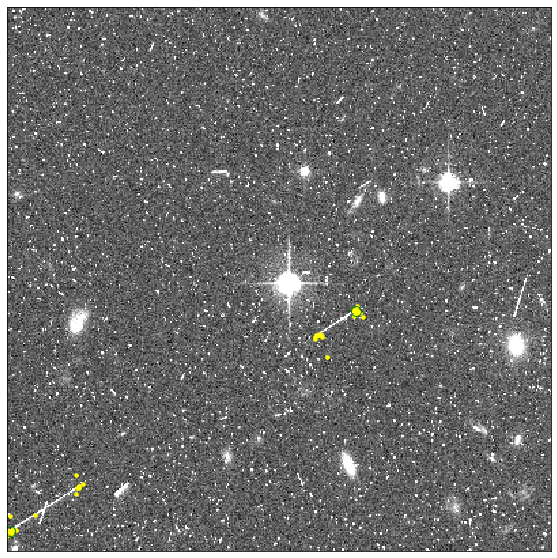

In [30]:
## Loop through all images and save the asteroid trail position

#select all images with p_asteroid>0.3

T0_asteroid=T0[T0["p_yes"]>0.3]

ex=T0_asteroid

a=ex["data.frame0.T1_tool0_clusters_x"].index
print(a)

for i in a:
    
    #check first if file exists
    
    if os.path.isfile('../Blind_asteroid_markings/'+str(ex["filename"][i][:-4])+'_marked.png'):
                      pass
        
    else:
        try:
            #print(ex["filename"][i])

            figsize=(10,10)
            fig, ax = plt.subplots(figsize=figsize)
            img = plt.imread(base_url+str(ex["filename"][i]))

            # plot *all* the markings
            x = ex["data.frame0.T1_tool0_points_x"][i]

            x1 = tuple(float(s) for s in x.strip("[]").split(","))
            x2 = tuple(float(s) for s in x.strip("[]").split(","))

            y = ex["data.frame0.T1_tool0_points_y"][i]

            y1 = tuple(float(s) for s in y.strip("[]").split(","))
            y2 = tuple(float(s) for s in y.strip("[]").split(","))

            ax.scatter(x1,y1,s=10,facecolors='yellow',edgecolors='yellow')
            ax.scatter(x2,y2,s=10,facecolors='yellow',edgecolors='yellow')

            # plot the *clustered* markings only

            x = ex["data.frame0.T1_tool0_clusters_x"][i]

            x1 = tuple(float(s) for s in x.strip("[]").split(","))[0]
            x2 = tuple(float(s) for s in x.strip("[]").split(","))[1]

            y = ex["data.frame0.T1_tool0_clusters_y"][i]
            y1 = tuple(float(s) for s in y.strip("[]").split(","))[0]
            y2 = tuple(float(s) for s in y.strip("[]").split(","))[1]

            ax.scatter(x1,y1,s=100,facecolors='none',edgecolors='green')
            ax.scatter(x2,y2,s=100,facecolors='none',edgecolors='green')

            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)

            ax.imshow(img)
            plt.savefig("../Blind_asteroid_markings/"+str(ex["filename"][i][:-4])+"_marked.png", dpi=200, bbox_inches='tight')

        except (AttributeError, IndexError): 

            print(i)

            figsize=(10,10)
            fig, ax = plt.subplots(figsize=figsize)
            img = plt.imread(base_url+str(ex["filename"][i]))

            # plot *all* the markings
            x = ex["data.frame0.T1_tool0_points_x"][i]

            x1 = tuple(float(s) for s in x.strip("[]").split(","))
            x2 = tuple(float(s) for s in x.strip("[]").split(","))

            y = ex["data.frame0.T1_tool0_points_y"][i]

            y1 = tuple(float(s) for s in y.strip("[]").split(","))
            y2 = tuple(float(s) for s in y.strip("[]").split(","))

            ax.scatter(x1,y1,s=10,facecolors='yellow',edgecolors='yellow')
            ax.scatter(x2,y2,s=10,facecolors='yellow',edgecolors='yellow')

            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)

            ax.imshow(img)
            plt.savefig("../Blind_asteroid_markings/"+str(ex["filename"][i][:-4])+"_marked.png", dpi=200, bbox_inches='tight')

### Plot clustered points only

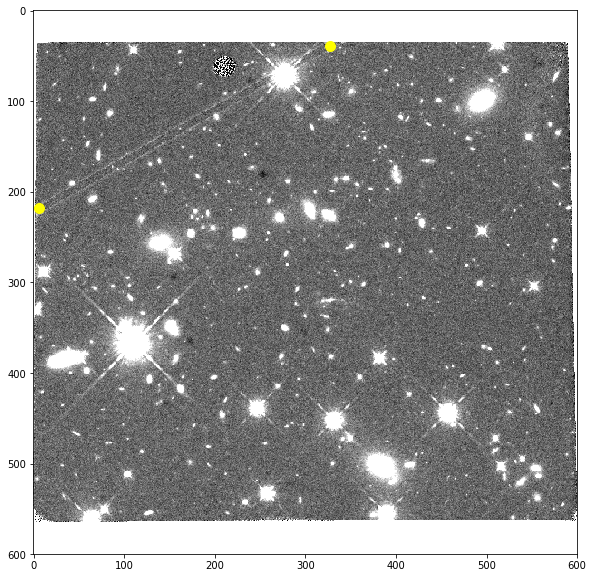

In [33]:
figsize=(10,10)
fig, ax = plt.subplots(figsize=figsize)

T0_asteroid=T0[T0["p_yes"]>0.5]

ex = T0_asteroid.sample()

img = plt.imread(base_url+str(ex["filename"].to_string(index=False).strip()))
ax.imshow(img)

x = ex["data.frame0.T1_tool0_clusters_x"].iloc[0]

x1 = tuple(float(s) for s in x.strip("[]").split(","))[0]
x2 = tuple(float(s) for s in x.strip("[]").split(","))[1]

y = ex["data.frame0.T1_tool0_clusters_y"].iloc[0]
y1 = tuple(float(s) for s in y.strip("[]").split(","))[0]
y2 = tuple(float(s) for s in y.strip("[]").split(","))[1]

ax.scatter(x1,y1,s=100,facecolors='yellow',edgecolors='yellow')
ax.scatter(x2,y2,s=100,facecolors='yellow',edgecolors='yellow')

### Images with a second asteroid

We need to use the T2 & T3 questions

Number of images with >1 asteroid trail is  62


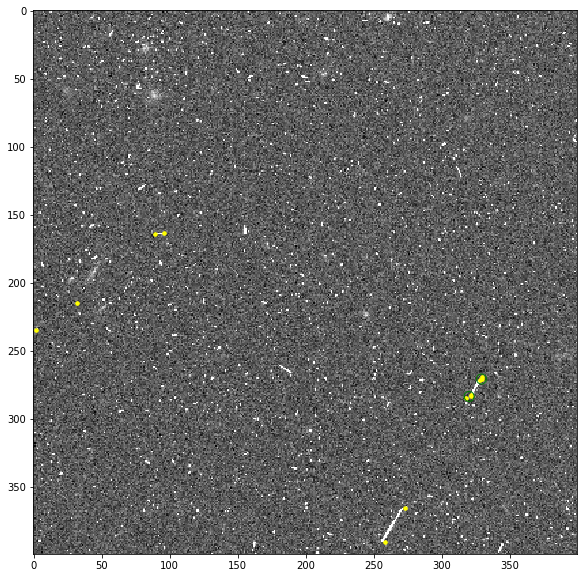

In [34]:
#select a more conservative limit for the second asteroid trail, p_asteroid>0.3

T2_asteroid=T2[(T2["p_yes"]>0.5) & (T2["data.yes"]+T2["data.no"]+T2["data.impossible-to-tell"]>=10)]
print('Number of images with >1 asteroid trail is ', len(T2_asteroid))

figsize=(10,10)
fig, ax = plt.subplots(figsize=figsize)

#print random example

ex = T2_asteroid.sample()

img = plt.imread(base_url+str(ex["filename"].to_string(index=False).strip()))
ax.imshow(img)

# plot *all* the markings
x = ex["data.frame0.T3_tool0_points_x"].iloc[0]

x1 = tuple(float(s) for s in x.strip("[]").split(","))
x2 = tuple(float(s) for s in x.strip("[]").split(","))

y = ex["data.frame0.T3_tool0_points_y"].iloc[0]

y1 = tuple(float(s) for s in y.strip("[]").split(","))
y2 = tuple(float(s) for s in y.strip("[]").split(","))

ax.scatter(x1,y1,s=10,facecolors='yellow',edgecolors='yellow')
ax.scatter(x2,y2,s=10,facecolors='yellow',edgecolors='yellow')

# plot the *clustered* markings only

x = ex["data.frame0.T3_tool0_clusters_x"].iloc[0]

x1 = tuple(float(s) for s in x.strip("[]").split(","))[0]
x2 = tuple(float(s) for s in x.strip("[]").split(","))[1]

y = ex["data.frame0.T3_tool0_clusters_y"].iloc[0]
y1 = tuple(float(s) for s in y.strip("[]").split(","))[0]
y2 = tuple(float(s) for s in y.strip("[]").split(","))[1]

ax.scatter(x1,y1,s=100,facecolors='none',edgecolors='green')
ax.scatter(x2,y2,s=100,facecolors='none',edgecolors='green')

Save files with 2 asteroids marked

FileNotFoundError: [Errno 2] No such file or directory: 'SSO_asteroid_markings/j9epc7bbq_drz_2017OY9_marked_2.png'

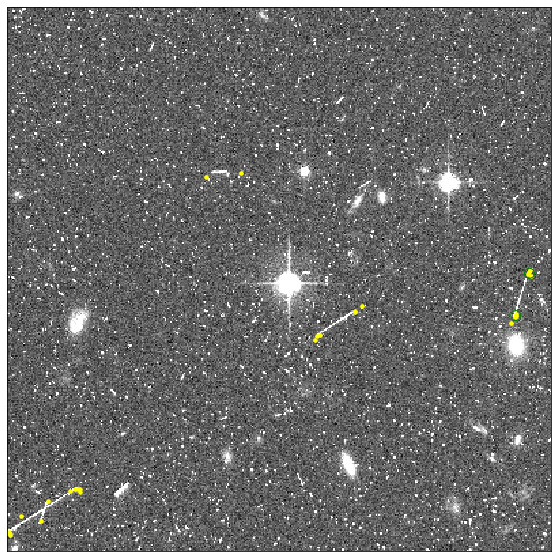

In [35]:
## Loop through all images and save the asteroid trail position

#select all images with p_asteroid>0.5 & at least 10 votes for the 2nd question
T2_asteroid=T2[(T2["p_yes"]>0.5) & (T2["data.yes"]+T2["data.no"]+T2["data.impossible-to-tell"]>=10)]

ex=T2_asteroid

a=ex["data.frame0.T3_tool0_clusters_x"].index

for i in a:
    try:
        #print(ex["filename"][i],ex["p_yes"][i])
    
        figsize=(10,10)
        fig, ax = plt.subplots(figsize=figsize)
        img = plt.imread(base_url+str(ex["filename"][i]))

        # plot *all* the markings
        x = ex["data.frame0.T3_tool0_points_x"][i]

        x1 = tuple(float(s) for s in x.strip("[]").split(","))
        x2 = tuple(float(s) for s in x.strip("[]").split(","))

        y = ex["data.frame0.T3_tool0_points_y"][i]

        y1 = tuple(float(s) for s in y.strip("[]").split(","))
        y2 = tuple(float(s) for s in y.strip("[]").split(","))

        ax.scatter(x1,y1,s=10,facecolors='yellow',edgecolors='yellow')
        ax.scatter(x2,y2,s=10,facecolors='yellow',edgecolors='yellow')

        # plot the *clustered* markings only

        x = ex["data.frame0.T3_tool0_clusters_x"][i]

        x1 = tuple(float(s) for s in x.strip("[]").split(","))[0]
        x2 = tuple(float(s) for s in x.strip("[]").split(","))[1]

        y = ex["data.frame0.T3_tool0_clusters_y"][i]
        y1 = tuple(float(s) for s in y.strip("[]").split(","))[0]
        y2 = tuple(float(s) for s in y.strip("[]").split(","))[1]

        ax.scatter(x1,y1,s=100,facecolors='none',edgecolors='green')
        ax.scatter(x2,y2,s=100,facecolors='none',edgecolors='green')
        
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    
        ax.imshow(img)
        plt.savefig("../SSO_asteroid_markings/"+str(ex["filename"][i][:-4])+"_marked_2.png", dpi=200, bbox_inches='tight')
        
    except (AttributeError): 
        
        print(i,ex["p_yes"][i])
    
        figsize=(10,10)
        fig, ax = plt.subplots(figsize=figsize)
        img = plt.imread(base_url+str(ex["filename"][i]))

        # plot *all* the markings
        x = ex["data.frame0.T3_tool0_points_x"][i]

        x1 = tuple(float(s) for s in x.strip("[]").split(","))
        x2 = tuple(float(s) for s in x.strip("[]").split(","))

        y = ex["data.frame0.T3_tool0_points_y"][i]

        y1 = tuple(float(s) for s in y.strip("[]").split(","))
        y2 = tuple(float(s) for s in y.strip("[]").split(","))

        ax.scatter(x1,y1,s=10,facecolors='yellow',edgecolors='yellow')
        ax.scatter(x2,y2,s=10,facecolors='yellow',edgecolors='yellow')
        
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    
        ax.imshow(img)
        plt.savefig("../SSO_asteroid_markings/"+str(ex["filename"][i][:-4])+"_marked_2.png", dpi=200, bbox_inches='tight')

/Users/skruk/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(array([13290.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   936.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

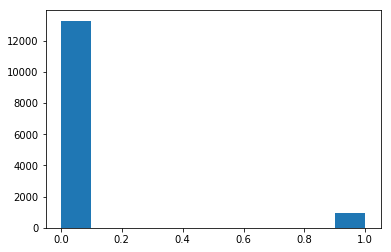

In [40]:
data["asteroid"]=0

for file_name in glob.glob("../Blind_asteroid_markings/Good/*.png"):
    file=file_name.split('/')[3][:-11]+".png"
    for i in range(0,len(data)):
        if data["filename"].iloc[i]==file:
            data["asteroid"].iloc[i]=1
            #os.system("cp -r /Users/skruk/Documents/ESA_citizen_science/Asteroid_finder/Results/Blind_images/"+str(data["filename"][i])+" Asteroids/"+str(data["filename"][i]))

plt.hist(data["asteroid"])

In [18]:
data_no=T0[T0["p_yes"]<0.1]
print(data_no["filename"])

for i in range(0,len(data_no)):
    os.system("cp -r /Users/skruk/Documents/ESA_citizen_science/Asteroid_finder/Results/Blind_images/"+str(data_no["filename"].iloc[i])+" No_asteroids_clean/"+str(data_no["filename"].iloc[i]))


1       j8pm06010_drz_2015AQ146.png
2       j8oz05010_drz_2015VM154.png
5       j8pt01031_drz_2015AB190.png
9        jb512b010_drz_2015EC29.png
13        j96r23041_drz_2015QC9.png
                   ...             
7104              ibtt0aolq_drz.png
7107              ibsh10010_drz.png
7108              ibig04020_drz.png
7110              ibig04010_drz.png
7112              icas23010_drz.png
Name: filename, Length: 3022, dtype: object
